In [1]:
import pandas as pd

# Load the dataset
customer_data = pd.read_csv('customer_dataset.csv')

/var/folders/p1/z8dhpprj11b1w1rsyp3fh4zr0000gn/T/ipykernel_42228/3294755354.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('customer_dataset.csv')


In [2]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [3]:
customer_data.count()

customer_id                        570000
average_monthly_spend              560614
average_monthly_visit_frequency    560672
average_monthly_basket_size        560714
dtype: int64

In [4]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 customer_id                           0
average_monthly_spend              9386
average_monthly_visit_frequency    9328
average_monthly_basket_size        9286
dtype: int64


In [5]:
# Drop rows with missing values
customer_data.dropna(inplace=True)

In [6]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


In [7]:
customer_data.count()

customer_id                        542000
average_monthly_spend              542000
average_monthly_visit_frequency    542000
average_monthly_basket_size        542000
dtype: int64

In [8]:
# Check for duplicates
duplicate_rows = customer_data['customer_id'].duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 10000


In [9]:
# Remove duplicates based on 'customer_id'
customer_data.drop_duplicates(subset=['customer_id'], inplace=True)

In [10]:
# Check for duplicates
duplicate_rows = customer_data['customer_id'].duplicated().sum()
print("Duplicate Rows:", duplicate_rows)


Duplicate Rows: 0


In [11]:
# Check for duplicates
duplicate_rows = customer_data.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 0


In [12]:
customer_data[customer_data['customer_id'] == 244801]

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
244800,244801,4225.0,2.94,1.92


In [13]:
# Remove duplicates
customer_data.drop_duplicates(inplace=True)

In [14]:
customer_data.count()

customer_id                        532000
average_monthly_spend              532000
average_monthly_visit_frequency    532000
average_monthly_basket_size        532000
dtype: int64

In [15]:
# Check for outliers and handle them if necessary
# (e.g., using z-score or IQR method)

In [16]:
# Check if a specific column contains multiple data types
def check_mixed_types(series):
    types = series.map(type).unique()  # Maps the type function to all elements and gets unique types
    return len(types) > 1  # Returns True if more than one type is found

# Apply this check to each column in the DataFrame
mixed_type_columns = {col: check_mixed_types(customer_data[col]) for col in customer_data.columns}
print(mixed_type_columns)


{'customer_id': False, 'average_monthly_spend': True, 'average_monthly_visit_frequency': True, 'average_monthly_basket_size': False}


In [17]:
# Function to count types in a column
def type_counts(series):
    return series.apply(lambda x: type(x).__name__).value_counts()

# Apply this function to each column you want to analyze
type_breakdown = type_counts(customer_data['average_monthly_spend'])
print(type_breakdown)


average_monthly_spend
float    407441
str      124559
Name: count, dtype: int64


In [18]:
import pandas as pd

# Assuming customer_data is already loaded
# Create a mask where the type of the cell content is str
mask = customer_data['average_monthly_spend'].apply(lambda x: isinstance(x, str))

# Print the number of string entries found (for verification)
print("Number of string entries in 'average_monthly_spend':", mask.sum())

Number of string entries in 'average_monthly_spend': 124559


In [19]:
# customer_data_str = customer_data[mask]

In [20]:
# customer_data_str

In [21]:
# customer_data_str_digit_mask = customer_data_str['average_monthly_spend'].apply(lambda x: x.isdigit())

In [22]:
# customer_data_str_digit_mask

In [23]:
# def try_convert(x):
#     try:
#         return int(x)
#     except ValueError:
#         return None  # or return x to see the problematic value

# # Apply this function to the column
# customer_data_str['convertible'] = customer_data_str['average_monthly_spend'].apply(try_convert)

# # Filter to find rows where the conversion failed
# non_convertible_rows = customer_data_str[customer_data_str['convertible'].isnull()]

# print(non_convertible_rows)

In [24]:
from word2number import w2n

def smart_convert(x):
    try:
        return float(x)
    except ValueError:
        try:
            return w2n.word_to_num(x)
        except ValueError:
            return None  # Still return None if conversion fails

# Apply this smarter conversion function
customer_data['average_monthly_spend'] = customer_data['average_monthly_spend'].apply(smart_convert)

In [25]:
customer_data[customer_data['customer_id'] == 27]

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
26,27,900.0,1.9,1.24


In [26]:
# customer_data_int = customer_data[~mask]

In [27]:
# customer_data_int

In [28]:
# Verify the remaining data types in the column
print("Data types after cleanup:\n", customer_data['average_monthly_spend'].apply(type).value_counts())

Data types after cleanup:
 average_monthly_spend
<class 'float'>    532000
Name: count, dtype: int64


In [29]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
5,6,172333.0,14.16,35.06
...,...,...,...,...
559995,559996,42002.0,5.1,9.72
559996,559997,11523.0,1.43,4.16
559997,559998,20502.0,7.02,9.23
559998,559999,3876.0,1.14,2.84


In [30]:
# Function to count types in a column
def type_counts(series):
    return series.apply(lambda x: type(x).__name__).value_counts()

# Apply this function to each column you want to analyze
type_breakdown = type_counts(customer_data['average_monthly_visit_frequency'])
print(type_breakdown)

average_monthly_visit_frequency
float    373583
str      158417
Name: count, dtype: int64


In [31]:
import pandas as pd

# Assuming customer_data is already loaded
# Create a mask where the type of the cell content is str
mask = customer_data['average_monthly_visit_frequency'].apply(lambda x: isinstance(x, str))

# Print the number of string entries found (for verification)
print("Number of string entries in 'average_monthly_visit_frequency':", mask.sum())

Number of string entries in 'average_monthly_visit_frequency': 158417


In [32]:
def try_convert(x):
    try:
        return float(x)
    except ValueError:
        return None  # or return x to see the problematic value

# Apply this function to the column
customer_data['convertible'] = customer_data['average_monthly_visit_frequency'].apply(try_convert)

# Filter to find rows where the conversion failed
non_convertible_rows = customer_data[customer_data['convertible'].isnull()]

print(non_convertible_rows)

        customer_id  average_monthly_spend average_monthly_visit_frequency  \
322986       322987                 8017.0                   one point two   
323648       323649                92323.0                 nine point five   
324577       324578                 6425.0                             two   
326775       326776                96690.0                      twenty two   

        average_monthly_basket_size  convertible  
322986                         4.00          NaN  
323648                        35.22          NaN  
324577                         3.62          NaN  
326775                        17.52          NaN  


In [33]:
from word2number import w2n

def smart_convert(x):
    try:
        return float(x)
    except ValueError:
        try:
            return w2n.word_to_num(x)
        except ValueError:
            return None  # Still return None if conversion fails

# Apply this smarter conversion function
customer_data['average_monthly_visit_frequency'] = customer_data['average_monthly_visit_frequency'].apply(smart_convert)

In [34]:
customer_data[customer_data['customer_id'] == 322987]

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,convertible
322986,322987,8017.0,1.2,4.0,NaN


In [35]:
customer_data.drop(['convertible'], axis=1, inplace=True)

In [36]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
5,6,172333.0,14.16,35.06
...,...,...,...,...
559995,559996,42002.0,5.10,9.72
559996,559997,11523.0,1.43,4.16
559997,559998,20502.0,7.02,9.23
559998,559999,3876.0,1.14,2.84


In [37]:
customer_data.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,532000.000000,5.320000e+05,532000.000000,532000.000000
mean,280057.478981,4.825895e+04,6.879067,13.292778
std,161691.508182,9.173131e+04,5.323586,12.039068
min,1.000000,-1.233400e+04,-20.000000,-19.000000
25%,139923.750000,1.049900e+04,2.390000,3.800000
50%,280109.500000,3.196000e+04,5.600000,9.790000
75%,420172.250000,8.541850e+04,9.850000,17.480000
max,560000.000000,4.833000e+07,432.740000,385.040000


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

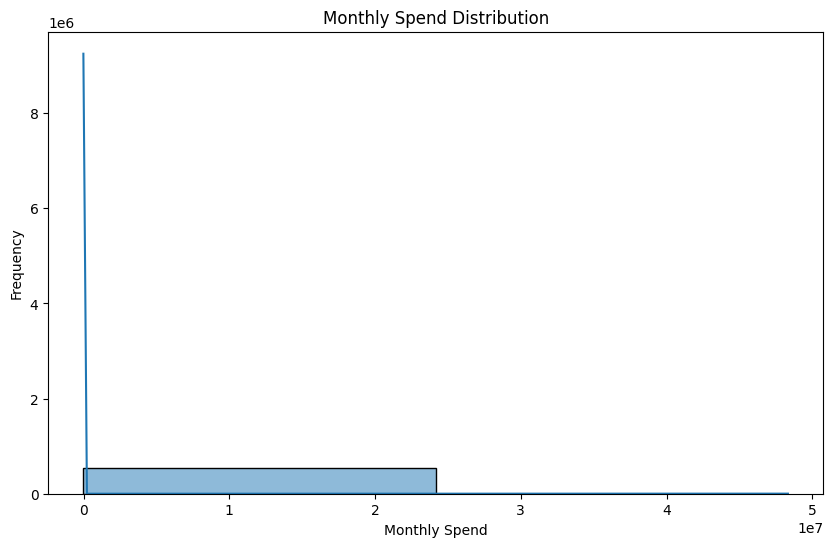

In [39]:
# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['average_monthly_spend'], bins=2, kde=True)
plt.title('Monthly Spend Distribution')
plt.xlabel('Monthly Spend')
plt.ylabel('Frequency')
plt.show()

In [40]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
5,6,172333.0,14.16,35.06


In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])
customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']] = scaled_features

# Derived metrics (if needed)
# e.g., customer_data['spend_per_visit'] = customer_data['monthly_spend'] / customer_data['monthly_visit_frequency']


In [ ]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,-0.517479,-1.083682,-0.868239
1,2,1.402097,1.664468,1.705883
3,4,-0.105929,0.176748,-0.212872
4,5,0.004939,0.118517,-0.270185
5,6,1.352582,1.367676,1.808051


In [41]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Select the columns to use for clustering
cluster_data = customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']]


# Create a DBSCAN model with eps=0.5 and min_samples=5
dbscan = DBSCAN(eps=100000,min_samples=50)

# Fit the model to the data
dbscan.fit(cluster_data)

# Assign each outlet to a cluster
customer_data['cluster'] = dbscan.labels_



# Fit the model to the data
dbscan.fit(cluster_data)

# inertia = dbscan.inertia_

# Get the cluster labels
labels = dbscan.labels_

# Calculate the silhouette score of the model
silhouette = silhouette_score(cluster_data, labels)

# Calculate the Davies-Bouldin index of the model
davies_bouldin = davies_bouldin_score(cluster_data, labels)

# Calculate the Calinski-Harabasz index of the model
calinski_harabasz = calinski_harabasz_score(cluster_data, labels)

# Print the values of the evaluation metrics
# print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

: 

In [397]:
# Model Selection (e.g., K-means clustering)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

cluster_data = customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']]

kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(cluster_data)

# Assign each outlet to a cluster
customer_data['cluster'] = kmeans.labels_


# Get the cluster labels
labels = kmeans.labels_

# Calculate the inertia of the model
inertia = kmeans.inertia_

# Calculate the silhouette score of the model
silhouette = silhouette_score(cluster_data, labels)

# Calculate the Davies-Bouldin index of the model
davies_bouldin = davies_bouldin_score(cluster_data, labels)

# Calculate the Calinski-Harabasz index of the model
calinski_harabasz = calinski_harabasz_score(cluster_data, labels)

# Print the values of the evaluation metrics
print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(customer_data['cluster'].unique())

KeyboardInterrupt: 